# *************************************************************
#Pontifícia Universidade Católica de Minas Gerais - PUC-Minas
# Pós Graduação em Ciência de Dados e Big Data
# Trabalho de Conclusão de Curso
## Um Modelo de Aprendizado de Máquina Supervisionado para Previsão de Quantidade de Público nos Jogos do Campeonato Brasileiro de Futebol

## Autor: Salomão Fernandes de Freitas Júnior
## FEVEREIRO/2024


## ETAPA 2: Preparação de Dados

## Importação de Bibliotecas e Leitura de datasets





In [35]:
# Importação de Bibliotecas
import pandas as pd
import missingno as missing # biblioteca interessante para visualização gráfica dos dados nulos
from matplotlib import pyplot as plt
import warnings



In [37]:
warnings.filterwarnings("ignore")

In [2]:
# Leitura dos datasets
# Este dataset contém dados de 29/03/2003 a 26/10/2023, obtidos em https://basedosdados.org/dataset/c861330e-bca2-474d-9073-bc70744a1b23?table=18835b0d-233e-4857-b454-1fa34a81b4fa
df_brasileirao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUC Minas - TCC Ciência de Dados/Datasets/brasileirao_serie_a.csv', sep= ';')

# Os demais dados (27/10/2023 a 07/12/2023) preenchemos com dados obtidos em https://www.srgoool.com.br/
# Estão neste dataset
df_brasileirao_comp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUC Minas - TCC Ciência de Dados/Datasets/brasileirao_serie_a_dados_complementares_2023.csv', sep= ';')



display(df_brasileirao.head())
print('')
print('')
display(df_brasileirao_comp.head())

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2017,21/05/2017,2,Arena Condá,André Luiz de Freitas Castro,10323.0,22600.0,Chapecoense,Palmeiras,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,30/05/2017,3,Arena Condá,Marcelo de Lima Henrique,6188.0,22600.0,Chapecoense,Avaí FC,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,09/06/2017,5,Arena Condá,Rodolpho Toski Marques,14403.0,22600.0,Chapecoense,Grêmio,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,15/06/2017,7,Arena Condá,Jailson Macedo Freitas,10033.0,22600.0,Chapecoense,Vasco da Gama,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,18/06/2017,8,Arena Condá,Marcelo Aparecido Ribeiro de Souza,11603.0,22600.0,Chapecoense,Botafogo,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2023,23/11/2023,29,NaN,NaN,25206,25206,Fortaleza,Botafogo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,28/10/2023,30,NaN,NaN,33747,33747,Palmeiras,EC Bahia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,28/10/2023,30,NaN,NaN,1836,1836,América-MG,Grêmio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,28/10/2023,30,NaN,NaN,19358,19358,Atlético-MG,Fluminense,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,29/10/2023,30,NaN,NaN,10145,10145,Goiás,Vasco da Gama,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Visualizando as colunas do DF e seu tipos de dados
df_brasileirao.dtypes

ano_campeonato                      int64
data                               object
rodada                              int64
estadio                            object
arbitro                            object
publico                           float64
publico_max                       float64
time_mandante                      object
time_visitante                     object
tecnico_mandante                   object
tecnico_visitante                  object
colocacao_mandante                float64
colocacao_visitante               float64
valor_equipe_titular_mandante     float64
valor_equipe_titular_visitante    float64
idade_media_titular_mandante      float64
idade_media_titular_visitante     float64
gols_mandante                     float64
gols_visitante                    float64
gols_1_tempo_mandante             float64
gols_1_tempo_visitante            float64
escanteios_mandante               float64
escanteios_visitante              float64
faltas_mandante                   

## Seleção de Atributos

### Em nossa Análise Exploratória prévia, no Notebook 01 - Análise Exploratória, já identificamos os atributos de interesse, conforme nossos requisitos (VER TRABALHO). Vamos manter somente estes em nossos datasets

In [4]:
#Selecionando somente as colunas de interesse
col_interesse = ['ano_campeonato', 'data', 'rodada', 'publico', 'time_mandante', 'time_visitante', 'colocacao_mandante', 'colocacao_visitante',
                 'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante', 'gols_mandante', 'gols_visitante']

df_brasileirao = df_brasileirao[col_interesse]
df_brasileirao_comp = df_brasileirao_comp[col_interesse]

#df_brasileirao.head()
display(df_brasileirao.sample(10))
print('')
print('')
display(df_brasileirao_comp.sample(10))

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
7773,2011,27/11/2011,37,34132.0,Fluminense,Vasco da Gama,3.0,2.0,22450000.0,15150000.0,1.0,2.0
5432,2003,12/10/2003,36,NaN,Figueirense FC,Criciúma EC,NaN,NaN,NaN,NaN,4.0,2.0
2064,2008,13/07/2008,11,22235.0,São Paulo,Palmeiras,7.0,5.0,33800000.0,26100000.0,2.0,1.0
6665,2022,10/07/2022,16,8588.0,Santos,Atlético-GO,10.0,16.0,28600000.0,6700000.0,1.0,0.0
2562,2020,05/02/2021,34,0.0,Botafogo,Sport Recife,20.0,16.0,5880000.0,7950000.0,0.0,1.0
6318,2013,14/07/2013,7,9272.0,Criciúma EC,Goiás EC,17.0,12.0,5850000.0,5000000.0,0.0,0.0
4828,2010,15/08/2010,14,14721.0,Avaí FC,Corinthians,7.0,2.0,7850000.0,20200000.0,3.0,2.0
5495,2004,02/05/2004,4,NaN,Fluminense,Vasco da Gama,NaN,NaN,NaN,NaN,1.0,0.0
5584,2004,14/08/2004,24,NaN,Internacional,Figueirense FC,NaN,NaN,NaN,NaN,4.0,0.0
7889,2011,30/10/2011,32,21315.0,Vasco da Gama,São Paulo,1.0,6.0,12650000.0,28200000.0,0.0,0.0


,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
15,2023,01/11/2023,31,21767,Coritiba FC,Grêmio,19,4,NaN,NaN,1,2
88,2023,06/12/2023,38,0,Coritiba FC,Corinthians,19,13,NaN,NaN,0,2
64,2023,29/11/2023,36,7809,Cuiabá-MT,Internacional,12,10,NaN,NaN,0,2
79,2023,03/12/2023,37,3442,RB Bragantino,Coritiba FC,6,19,NaN,NaN,1,0
16,2023,01/11/2023,31,33200,Botafogo,Palmeiras,1,2,NaN,NaN,3,4
58,2023,26/11/2023,35,39504,Fortaleza,Palmeiras,12,1,NaN,NaN,2,2
59,2023,26/11/2023,35,39598,América-MG,Flamengo,20,2,NaN,NaN,0,3
76,2023,03/12/2023,37,49312,Fortaleza,Goiás,10,18,NaN,NaN,1,0
54,2023,26/11/2023,35,26548,Botafogo,Santos,3,15,NaN,NaN,1,1
71,2023,02/12/2023,37,40338,Corinthians,Internacional,13,9,NaN,NaN,1,2


## Ajustes de Valores e Tipos de Dados

### Em nossa Análise exploratória prévia no Notebook 01 - Análise Exploratória, ao analisar as tabelas de frequência dos atributos time_mandante e time_visitante, pudemos perceber que os seguintes times aparecem duplicados, com nomes diferentes:

- Athletico-PR x Atlético-PR
- Goiás x Goiás EC
- Santos x Santos FC

Assim, agora iremos que padronizar esses nomes.

Ao preencher os dados complementares (27/10/2024 a 07/12/2024), já utlizamos nomes padronizados (Athletico-PR, Goiás, Santos), os quais iremos utlizar para ajuste no dataset maior

In [5]:
# Visualizando as tabelas de frequência com a duplicidade
cols = ['time_mandante', 'time_visitante']

for col in cols:
  df_freq = df_brasileirao[col].value_counts().reset_index().rename(columns={'index': col, col: 'count'}).sort_values([col])
  display(df_freq)
  print('')
  print('')



,time_mandante,count
27,América-MG,109
42,América-RN,19
29,Athletico-PR,91
24,Atlético-GO,133
3,Atlético-MG,375
12,Atlético-PR,285
25,Avaí FC,133
38,Barueri,38
10,Botafogo,337
45,Brasiliense-DF,19


,time_visitante,count
27,América-MG,110
44,América-RN,19
29,Athletico-PR,90
21,Atlético-GO,133
5,Atlético-MG,376
12,Atlético-PR,285
23,Avaí FC,133
39,Barueri,38
9,Botafogo,337
46,Brasiliense-DF,19


In [6]:
# Ajustando os nomes Atlético-PR, Goiás EC e Santos FC, com Athletico-PR, Goiás e Santos
# NO dataset maior

df_brasileirao.loc[df_brasileirao['time_mandante'] == 'Atlético-PR' , 'time_mandante'] = 'Athletico-PR'
df_brasileirao.loc[df_brasileirao['time_visitante'] == 'Atlético-PR' , 'time_visitante'] = 'Athletico-PR'

df_brasileirao.loc[df_brasileirao['time_mandante'] == 'Goiás EC' , 'time_mandante'] = 'Goiás'
df_brasileirao.loc[df_brasileirao['time_visitante'] == 'Goiás EC' , 'time_visitante'] = 'Goiás'

df_brasileirao.loc[df_brasileirao['time_mandante'] == 'Santos FC' , 'time_mandante'] = 'Santos'
df_brasileirao.loc[df_brasileirao['time_visitante'] == 'Santos FC' , 'time_visitante'] = 'Santos'


#print(df[df['time_visitante'] == 'Atlético-PR']['time_visitante'].count())
#print(df[df['time_visitante'] == 'Athletico-PR']['time_visitante'].count())

#df_brasileirao

In [7]:
# Visualizando as tabelas de frequência sem a duplicidade, após o ajuste
cols = ['time_mandante', 'time_visitante']

for col in cols:
  df_freq = df_brasileirao[col].value_counts().reset_index().rename(columns={'index': col, col: 'count'}).sort_values([col])
  display(df_freq)
  print('')
  print('')


,time_mandante,count
27,América-MG,109
41,América-RN,19
4,Athletico-PR,376
25,Atlético-GO,133
5,Atlético-MG,375
24,Avaí FC,133
37,Barueri,38
11,Botafogo,337
42,Brasiliense-DF,19
38,CSA,19


,time_visitante,count
27,América-MG,110
38,América-RN,19
7,Athletico-PR,375
24,Atlético-GO,133
6,Atlético-MG,376
25,Avaí FC,133
37,Barueri,38
10,Botafogo,337
39,Brasiliense-DF,19
42,CSA,19


In [8]:
# Visualizando as colunas do DF e seu tipos de dados
df_brasileirao.dtypes

ano_campeonato                      int64
data                               object
rodada                              int64
publico                           float64
time_mandante                      object
time_visitante                     object
colocacao_mandante                float64
colocacao_visitante               float64
valor_equipe_titular_mandante     float64
valor_equipe_titular_visitante    float64
gols_mandante                     float64
gols_visitante                    float64
dtype: object

In [9]:
# A princípio apenas a coluna data não foi reconhecida com o tipo correto (datetime)
# Mas nesse caso, com temos ainda 2 DF separados, vamos transformar somente após mesclar os dois dataframes

# df["Data"] = pd.to_datetime(df["Data"])
# Agrupamento por ano
# agrupamento_ano = df.groupby(df["Data"].dt.year)["Vendas"].sum()
# https://pt.linkedin.com/pulse/trabalhando-com-datas-pandas-fernanda-santos

## Análise de Valores Nulos

### Em nossa Análise Exploratória prévia, no Notebook 01 - Análise Exploratória, identificamos que alguns atributos possuem valores nulos em algumas linhas.
### Agora vamos tratar cada caso, optando por alguma estratégia de preenchimento desses valores, ou mesmo pela exclusão de linha que apresentam atributos com valor nulo.
### Vamos Tratar ainda cada dataset separadamente, e logo após o tratamento dos dados nulos, vamos unir as bases em um só dataframe, antes de prosseguir com as próximas sub-etapas da preparação de dados.

### Tratando nulos do dataset menor df_brasileirao_comp

In [10]:
# VAMOS PRIMEIRAMENTE TRATAR A BASE COM DADOS COMPLEMENTARES (PERÍODO DE 27/10/2023 a 07/12/2023)
# COMO NÓS QUE FIZEMOS O SEU PREENCHIMENTO, JÁ SABEMOS QUE OS ATRIBUTOS valor_equipe_titular_mandante	valor_equipe_titular_visitante ESTÃO NULOS

#df_brasileirao_comp.info()

In [11]:
# Verificando a quantidade de nulos em cada atributo
# Confirmando os nossos atributos com 100% dos valores nulos
# e os demais totalmente preenchidos
print(df_brasileirao_comp.isnull().sum())
print('(Linhas, Colunas) = {}'.format(df_brasileirao_comp.shape))

ano_campeonato                     0
data                               0
rodada                             0
publico                            0
time_mandante                      0
time_visitante                     0
colocacao_mandante                 0
colocacao_visitante                0
valor_equipe_titular_mandante     91
valor_equipe_titular_visitante    91
gols_mandante                      0
gols_visitante                     0
dtype: int64
(Linhas, Colunas) = (91, 12)


In [12]:
# PARA ESTE DATASET, NOSSO TRATAMENTO É MAIS SIMPLES
# OS ATRIBUTOS QUE POSSUEM VALORES NULOS REPRESENTAM O VALOR ESTIMADO DOS TIMES VISTANTE E MANDANTE
# ENTEDEMOS QUE UMA BOA ESTRATÉGIA PODE SER VERIFICAR O VALOR DESSES ATRIBUTOS NO DATASET MAIOR,
# CONSIDERANDO SOMENTE O ANO DE 2023 (já que os dados aqui são o complemento do ano de 2023)

df_brasileirao_so_2023 = df_brasileirao[df_brasileirao['ano_campeonato'] == 2023 ]
#df_brasileirao_so_2023

# Vamos olhar só para um time, apenas para ver se esse valor varia ao longo dos jogos ou sse se mantém constante
df_brasileirao_so_2023[df_brasileirao_so_2023['time_mandante'] == 'Flamengo'][['time_mandante', 'rodada', 'valor_equipe_titular_mandante']].sort_values(by = 'rodada', ascending = True)



,time_mandante,rodada,valor_equipe_titular_mandante
7504,Flamengo,1,7965.0
7674,Flamengo,3,7895.0
7505,Flamengo,5,7860.0
7506,Flamengo,7,9015.0
7617,Flamengo,8,9010.0
7507,Flamengo,10,8420.0
7508,Flamengo,13,8560.0
7618,Flamengo,16,8170.0
7619,Flamengo,19,7700.0
7509,Flamengo,21,7900.0


In [13]:
# Variando esta consulta para vários times, verificamos que os valores variam de rodada a rodada
# Faz sentido, pois refere-se ao valor da equipe titular daquele jogo
# Então vamos usar a estratégia de preencher os valores faltantes com a média ou a mediana dos valores preenchidos, considerando só o ano de 2023
# Mas anters precisamos verificar se esses atributos estão todos preenchidos no dataset maior (de onde calcuaremos os valores para preencher no dataset menor)

df_brasileirao_so_2023[['valor_equipe_titular_mandante', 'valor_equipe_titular_visitante']].isnull().sum()


valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    0
dtype: int64

In [14]:
# Constatamos que não há valores nulos nos dados que serão utilizados para cálculo
# Então vamos dar uma olhadinha nos valores da média e mediana de cada time, fazendo um groupby
df_brasileirao_so_2023.groupby('time_mandante').aggregate({'valor_equipe_titular_mandante': ['mean','median']})


#df_brasileirao_so_2023.groupby('time_mandante').aggregate({'valor_equipe_titular_mandante': ['mean','median'], 'gols_mandante': 'sum'})
# Aqui a título de exemplo, cas quiséssemos fazer outra agregação com outro atributo. Veja que já fizemos duas agregações (mean e median) com o mesmo atributo
# poderíamos também pasaar mais de um atributo no groupby('time_mandante') em forma de lista

valor_equipe_titular_mandante        
                                       mean  median
time_mandante                                      
América-MG                       824.285714   832.5
Athletico-PR                    4782.000000  5190.0
Atlético-MG                     4477.142857  4470.0
Botafogo                        2554.285714  2565.0
Corinthians                     4380.714286  4425.0
Coritiba FC                     1681.785714  1665.0
Cruzeiro                        1955.333333  1950.0
Cuiabá-MT                        814.266667   810.0
EC Bahia                        2451.071429  2445.0
Flamengo                        8345.769231  8170.0
Fluminense                      3786.562500  3660.0
Fortaleza                       1360.357143  1395.0
Goiás                            989.857143  1021.5
Grêmio                          2831.333333  2790.0
Internacional                   3450.714286  3427.5
Palmeiras                       8281.785714  8125.0
RB Bragantino                   2966.200000  3080.0
Santos                          3605.000000  3600.0
São Paulo                       3088.333333  3080.0
Vasco da Gama                   3350.666667  2995.0

In [15]:
# Então vamos dar uma olhadinha também no atributo 'valor_equipe_titular_visitante'
df_brasileirao_so_2023.groupby('time_visitante').aggregate({'valor_equipe_titular_visitante': ['mean','median']})


valor_equipe_titular_visitante        
                                         mean  median
time_visitante                                       
América-MG                         967.066667   923.0
Athletico-PR                      3799.285714  3220.0
Atlético-MG                       4275.666667  4240.0
Botafogo                          2481.428571  2535.0
Corinthians                       4425.666667  4460.0
Coritiba FC                       1656.000000  1660.0
Cruzeiro                          2007.500000  2072.5
Cuiabá-MT                          807.285714   807.5
EC Bahia                          2413.333333  2435.0
Flamengo                          7899.375000  7750.0
Fluminense                        3826.923077  4075.0
Fortaleza                         1323.928571  1312.5
Goiás                              954.533333   963.0
Grêmio                            2918.571429  2725.0
Internacional                     3291.333333  3425.0
Palmeiras                         7303.333333  7345.0
RB Bragantino                     3149.142857  3105.0
Santos                            3378.928571  3595.0
São Paulo                         2993.571429  3065.0
Vasco da Gama                     3462.142857  3130.0

In [16]:
# Verificamos que os valores não são muito divergentes (indicando a não exsitência de outliers)
# Então optamos por usar a média para preenchimento dos valores faltantes no dataset menor

# Vamos linha por linha do dataset menor, preenchendo os atributos valor_equipe_titular_mandante e valor_equipe_titular_visitante
# com as médias calculadas de cada time do dataset maior (somente do ano de 2023)
#for index in range(len(df_brasileirao_comp)):
for index in df_brasileirao_comp.index:
  time_mand = df_brasileirao_comp.loc[index, 'time_mandante']
  df_brasileirao_comp.loc[df_brasileirao_comp['time_mandante'] == time_mand, 'valor_equipe_titular_mandante'] = df_brasileirao_so_2023[df_brasileirao_so_2023['time_mandante'] == time_mand]['valor_equipe_titular_mandante'].mean()

  time_visit = df_brasileirao_comp.loc[index, 'time_visitante']
  df_brasileirao_comp.loc[df_brasileirao_comp['time_visitante'] == time_visit, 'valor_equipe_titular_visitante'] = df_brasileirao_so_2023[df_brasileirao_so_2023['time_visitante'] == time_visit]['valor_equipe_titular_visitante'].mean()


# mostramos o DF para conferência
df_brasileirao_comp

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
0,2023,23/11/2023,29,25206,Fortaleza,Botafogo,9,1,1360.357143,2481.428571,2,2
1,2023,28/10/2023,30,33747,Palmeiras,EC Bahia,2,15,8281.785714,2413.333333,1,0
2,2023,28/10/2023,30,1836,América-MG,Grêmio,20,5,824.285714,2918.571429,3,4
3,2023,28/10/2023,30,19358,Atlético-MG,Fluminense,6,8,4477.142857,3826.923077,2,0
4,2023,29/10/2023,30,10145,Goiás,Vasco da Gama,17,18,989.857143,3462.142857,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
86,2023,06/12/2023,38,37724,Cruzeiro,Palmeiras,14,1,1955.333333,7303.333333,1,1
87,2023,06/12/2023,38,27844,Internacional,Botafogo,9,5,3450.714286,2481.428571,3,1
88,2023,06/12/2023,38,0,Coritiba FC,Corinthians,19,13,1681.785714,4425.666667,0,2
89,2023,06/12/2023,38,27743,EC Bahia,Atlético-MG,16,3,2451.071429,4275.666667,4,1


In [17]:
#df_brasileirao_comp[df_brasileirao_comp['time_mandante'] == 'Fortaleza']

### Tratando nulos do dataset maior df_brasileirao

In [18]:
# AGORA VAMOS ANALISAR OS VALORES NULOS NO DATSET MAIOR (df_brasileirao)

print(df_brasileirao.isnull().sum())
print('(Linhas, Colunas) = {}'.format(df_brasileirao.shape))

ano_campeonato                       0
data                                 0
rodada                               0
publico                           1711
time_mandante                        0
time_visitante                       0
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     2098
valor_equipe_titular_visitante    2098
gols_mandante                        1
gols_visitante                       1
dtype: int64
(Linhas, Colunas) = (8079, 12)


In [45]:
# OBSERVA-SE QUE ALGNS ATRIBUTOS POSSUEM VALORES NULOS. COMO NOSSO DF TEM 8079 LINHAS,
# VAMOS VER O PERCENTUAL DE NULOS DESSAS COLUNAS

# Para cada Variável no DF, iremos pegar a quantidade de dados nulos
# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)
df_nulos = pd.DataFrame()
df_nulos['Variável'] = df_brasileirao.columns

# Vamos colocar na outra coluna, a quantidade de nulos no DF
df_nulos['Quantidade_Não_Nulos'] = pd.Series()
df_nulos['Quantidade_Nulos'] = pd.Series()  #Uma coluna de um DF é um pd.Series(). Aqui criamos uma coluna vazia
df_nulos['Porcentagem_Nulos'] = pd.Series()
df_nulos['Label_Nulos'] = pd.Series() # Será usado no gráfico de barras, como label


for i in df_nulos.index:
    df_nulos.Quantidade_Nulos[i] = df_brasileirao[df_nulos['Variável'][i]].isna().sum()
    df_nulos.Quantidade_Não_Nulos[i] = len(df_brasileirao) - df_nulos.Quantidade_Nulos[i]
    df_nulos.Porcentagem_Nulos[i] = (df_brasileirao[df_nulos['Variável'][i]].isna().sum()/len(df_brasileirao))*100
    df_nulos.Label_Nulos[i] = 'Total de Nulos: {} ({:.2%})'.format(int(df_nulos.Quantidade_Nulos[i]), df_nulos.Porcentagem_Nulos[i]/100)

df_nulos

,Variável,Quantidade_Não_Nulos,Quantidade_Nulos,Porcentagem_Nulos,Label_Nulos
0,ano_campeonato,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
1,data,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
2,rodada,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
3,publico,6368.0,1711.0,21.178364,Total de Nulos: 1711 (21.18%)
4,time_mandante,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
5,time_visitante,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
6,colocacao_mandante,6369.0,1710.0,21.165986,Total de Nulos: 1710 (21.17%)
7,colocacao_visitante,6369.0,1710.0,21.165986,Total de Nulos: 1710 (21.17%)
8,valor_equipe_titular_mandante,5981.0,2098.0,25.968560,Total de Nulos: 2098 (25.97%)
9,valor_equipe_titular_visitante,5981.0,2098.0,25.968560,Total de Nulos: 2098 (25.97%)


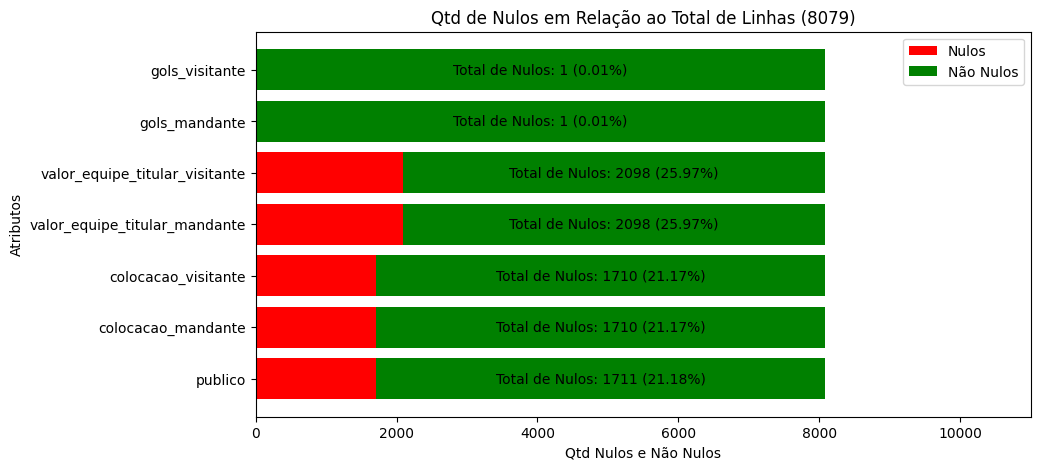

In [50]:
# VAMOS VISUALIZAR GRAFICAMENTE A PORCENTAGEM DE NULOS
# COM A BIBLIOTECA MATPLOTLIB

# Pegando somente as colunas que possuem dados nulos
df_nulos = df_nulos[df_nulos['Quantidade_Nulos'] > 0]

# Tamanho do Gráfico
plt.figure(figsize=(10,5))

#Criando as barras
bar1 = plt.barh(df_nulos.Variável, df_nulos.Quantidade_Nulos, color = 'red')
bar2 = plt.barh(df_nulos.Variável, df_nulos.Quantidade_Não_Nulos, color = 'green', left = df_nulos.Quantidade_Nulos )

# Isso é para colocar labels com os valores nas barras
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
#plt.bar_label(bar1, df_nulos.Label_Nulos, label_type = 'center' )
plt.bar_label(bar2, df_nulos.Label_Nulos, label_type = 'center')


# Adicionando legendas
plt.ylabel('Atributos')
plt.xlabel('Qtd Nulos e Não Nulos')
plt.title('Qtd de Nulos em Relação ao Total de Linhas ({})'.format(df_brasileirao.shape[0]))
plt.legend(('Nulos', 'Não Nulos'))

plt.xlim(right = 11000) # aumentando o limite do exio x,para a legenda não ficar em cima do gráfico


#plt.axvline(x = len(df_brasileirao), color = 'b', label = 'axvline - full height')

# Rotacionando rotulos do eixo X
#plt.xticks(rotation=40)

plt.show()

In [22]:
#missing.matrix(df_brasileirao, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

#### Verificamos quais são os atributos que contem dados nulos
#### Agora vamos tratar um por um

#### Iniciando por gols_mandante e gols_visitante (esses atributos tem apenas 1 dado nulo)

In [51]:
# gols_visitante e gols_mandante
# Esses atributos tem somente 1 dado nulo. Vamos ver que linha é
df_brasileirao[df_brasileirao['gols_visitante'].isna()]

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
803,2016,11/12/2016,38,NaN,Chapecoense,Atlético-MG,9.0,4.0,NaN,NaN,NaN,NaN


In [54]:
# Verifica-se que a linha onde ambos os atributos (gols_visitante e gols_mandante) estão nulos
# Refere-se a um jogo que não aconteceu, em virtude do acidente aéreo da Chapecoense
# Então iremos eliminar essa linha
df_brasileirao.dropna(subset = ['gols_visitante', 'gols_mandante'], inplace = True) # dropa as linhas cujas colunas do subset são nulas (pelo menos uma)


# Visualizando as varáiveis que tem dados nulos, e suas quantidades
df_brasileirao.isnull().sum()

ano_campeonato                       0
data                                 0
rodada                               0
publico                           1710
time_mandante                        0
time_visitante                       0
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     2097
valor_equipe_titular_visitante    2097
gols_mandante                        0
gols_visitante                       0
dtype: int64

#### Tratando nulos de valor_equipe_titular_mandante valor_equipe_titular_visitante
#### Cada um está nulo em 2097 linhas

In [59]:
# Vamo ver as linhas valor_equipe_titular_mandante valor_equipe_titular_visitante são nulos
df = df_brasileirao[df_brasileirao['valor_equipe_titular_mandante'].isna() | df_brasileirao['valor_equipe_titular_visitante'].isna()] # | or

df

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
36,2017,06/06/2017,4,13364.0,EC Bahia,Atlético-GO,13.0,20.0,NaN,NaN,3.0,0.0
37,2017,09/06/2017,5,18917.0,EC Bahia,Cruzeiro,9.0,8.0,NaN,NaN,1.0,0.0
38,2017,18/06/2017,8,33621.0,EC Bahia,Palmeiras,6.0,15.0,NaN,NaN,2.0,4.0
39,2017,25/06/2017,10,21929.0,EC Bahia,Flamengo,15.0,6.0,NaN,NaN,0.0,1.0
40,2017,09/07/2017,12,18267.0,EC Bahia,Fluminense,16.0,6.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7947,2011,20/11/2011,36,7840.0,Botafogo,Internacional,6.0,7.0,NaN,NaN,1.0,2.0
8058,2011,06/08/2011,15,15689.0,Atlético-MG,Figueirense FC,16.0,9.0,NaN,NaN,1.0,2.0
8059,2011,31/08/2011,20,14738.0,Cruzeiro,Figueirense FC,7.0,10.0,NaN,NaN,2.0,4.0
8060,2011,24/09/2011,26,7059.0,Santos,Figueirense FC,8.0,12.0,NaN,NaN,2.0,3.0


In [104]:
# Verificamos que os todas as ocorrências de nulos dos dois, estão em linhas comuns
# Veja consulta acima com or (|) apresenta 2097 linhas onde ambos estão nulos

# Primeiramente vamos verificar em que anos são essas ocorrências
#df.ano_campeonato.value_counts()
series_ano_count = df_brasileirao.groupby(['ano_campeonato'])['ano_campeonato'].count()

series_ano_count

ano_campeonato
2003    456
2004    456
2005    418
2006    380
2007    380
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    379
2017    380
2018    380
2019    380
2020    380
2021    380
2022    380
2023    289
Name: ano_campeonato, dtype: int64

In [70]:
df_ano = df_brasileirao[df_brasileirao['ano_campeonato'] == 2007]
df_ano.shape

(380, 12)